<a href="https://colab.research.google.com/github/KaranDave31/ML-codes/blob/main/ML_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([11, 16, 18, 30, 22, 38])

In [ ]:
def linear_regression(x, y):
    n = len(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    b1 = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) ** 2)
    b0 = mean_y - b1 * mean_x
    return b0, b1

def predict(x_val, b0, b1):
    return b0 + b1 * x_val

def r2_score(x, y, b0, b1):
    y_pred = b0 + b1 * x
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


b0 (Intercept): 8.357142857142858, b1 (Slope): 0.4714285714285714
Predicted y for x=27: 21.085714285714285


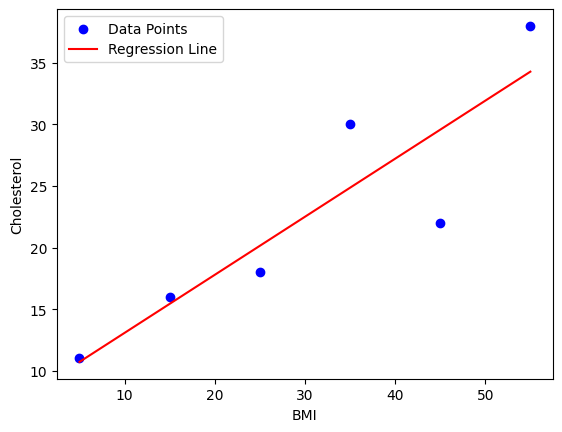

R-squared Value: 0.7913094027030955


In [ ]:
plt.scatter(x, y, color='blue', label='Data Points')

b0, b1 = linear_regression(x, y)
print(f"b0 (Intercept): {b0}, b1 (Slope): {b1}")

y_pred_27 = predict(27, b0, b1)
print(f"Predicted y for x=27: {y_pred_27}")

x_line = np.linspace(min(x), max(x), 100)
y_line = predict(x_line, b0, b1)
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel("BMI")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

r2 = r2_score(x, y, b0, b1)
print(f"R-squared Value: {r2}")

In [ ]:
x.shape

(6,)

In [ ]:
x = x[:,np.newaxis]
y = y[:,np.newaxis]

In [ ]:
x.shape

(6, 1)

In [ ]:
y.shape

(6, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x,y)
print(reg.coef_)
print(reg.intercept_)

[[0.47142857]]
[8.35714286]


In [ ]:
reg.predict([[27]])
#BMI_1 = np.array([27])
#reg.predict(BMI_1[:, np.newaxis])

array([[21.08571429]])

In [ ]:
print(reg.score(x,y))

0.7913094027030955


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML labs/Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
x = df['YearsExperience']
y = df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train = np.array([X_train])
y_train = np.array([y_train])

In [ ]:
X_test = np.array([X_test])
y_test = np.array([y_test])

In [ ]:
X_train.shape

(24, 1)

In [ ]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [ ]:
X_test.shape

(6, 1)

In [ ]:
y_test.shape

(6, 1)

In [ ]:
reg2 = LinearRegression().fit(X_train,y_train)

In [ ]:
print(reg2.coef_)
print(reg2.intercept_)

[[9423.81532303]]
[25321.58301178]


0.9645401573418146


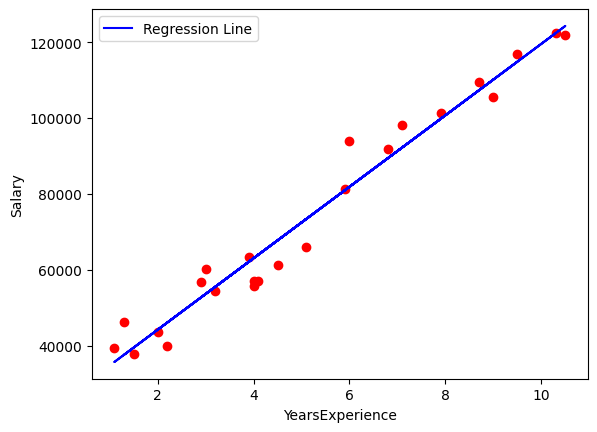

In [ ]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg2.predict(X_train),color='blue',label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
print(reg2.score(X_train,y_train))
plt.show()

0.9024461774180497


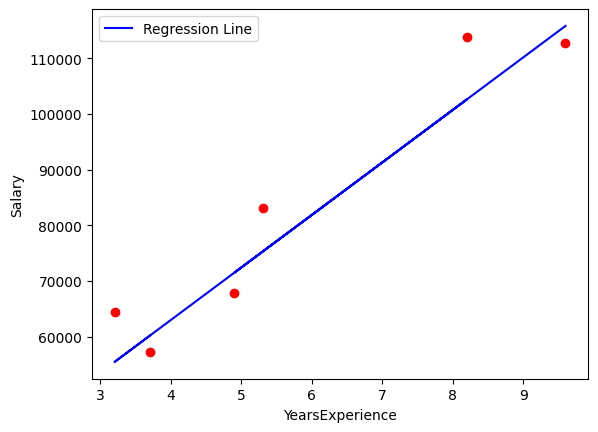

In [ ]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,reg2.predict(X_test),color='blue',label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
print(reg2.score(X_test,y_test))
plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error
y_pred = reg2.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7059.04362190151
